## UZOP Projekt - Predicting NBA shots
#### Ana Ujević 0036534085
# Priprema i vizualizacija podataka


#### Korišteni paketi

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analiza i čišćenje podataka
### Učitavanje i pregled podataka

In [13]:
X = pd.read_csv("shot_logs.csv")
#X.shape - prikaz koliko podataka ima (128069,21)
X.head() #prikaz podataka u obliku tablice



,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


### Značajke

In [9]:
X.columns.values

array(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN',
       'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES',
       'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id'], dtype=object)

### Opis značajki
- 'GAME_ID': Jedinstveni identifikator igre.
- 'MATCHUP': Datum i informacije o protivnicima i tipu igre- LOCATION': Mjesto na kojem se igrala utakmica (npr. "H" za domaću utakmicu i "A" za gostujuću utakmicu).
- 'W': Rezultat igre za ekipu igrača ("W" označava pobjedu, "L" označava poraz).
- 'FINAL_MARGIN': Konačna razlika u bodovima na kraju igre.
- 'SHOT_NUMBER': Redni broj šuta igrača tijekom utakmice.
- 'PERIOD': Period utakmice u kojem je šut izveden (npr. 1. četvrtina, 2. četvrtina itd.).
- 'GAME_CLOCK': Preostalo vrijeme u igri u trenutku izvođenja šuta.
- 'SHOT_CLOCK': Preostalo vrijeme u trenutku izvođenja šuta u tom napadu (napad traje 25s)
- 'DRIBBLES': Broj driblinga koje je igrač napravio prije šuta.
- 'TOUCH_TIME': Ukupno vrijeme dodira s loptom prije izvođenja šuta.
- 'SHOT_DIST': Udaljenost igrača od koša u trenutku izvođenja šuta.
- 'PTS_TYPE': Vrijednost šuta (npr. "2" za dvostruki šut i "3" za trica).
- 'SHOT_RESULT': Ishod šuta (npr. "made" za uspješan šut i "missed" za promašen šut).
- 'CLOSEST_DEFENDER': Ime najbližeg braniča protivničke momčadi.
- 'CLOSEST_DEFENDER_PLAYER_ID': Jedinstveni identifikator najbližeg braniča.
- 'CLOSE_DEF_DIST': Udaljenost između igrača i najbližeg braniča u trenutku izvođenja šuta.
- 'FGM': Oznaka za uspješan šut ("1" za uspješan šut, "0" za promašaj).
- 'PTS': Broj bodova osvojenih šutom.
- 'player_name': Ime igrača koji je izveo šut.
- 'player_id': Jedinstveni identifikator igrača koji baca
  dentifikator igrača.

In [14]:
X.info() # informacije o tipovima podataka značajki

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

### Čišćenje podataka

In [24]:
X.describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


### Monotoni atributi 

- provjeravamo postoje li monotoni atributi, odnosno atributi čija vrijednost jednoliko raste

In [19]:
X.nunique() #broji jedinstvene vrijednosti po stupcima

GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64

- zaključujemo da su monotoni atributi: game_id, player_id i matchup te ih izbacujemo

In [23]:
X.drop(('GAME_ID'), axis=1, inplace=True)
X.drop(('player_id'), axis=1, inplace=True)
X.drop(('MATCHUP'), axis=1, inplace=True)
X.drop(('player_name'), axis=1, inplace=True)

In [24]:
#prikaz nakon izbacivanja
X.nunique() 

LOCATION                        2
W                               2
FINAL_MARGIN                   88
SHOT_NUMBER                    38
PERIOD                          7
GAME_CLOCK                    719
SHOT_CLOCK                    241
DRIBBLES                       33
TOUCH_TIME                    313
SHOT_DIST                     448
PTS_TYPE                        2
SHOT_RESULT                     2
CLOSEST_DEFENDER              473
CLOSEST_DEFENDER_PLAYER_ID    474
CLOSE_DEF_DIST                299
FGM                             2
PTS                             3
dtype: int64

### Nedostajući podaci

In [25]:
X.isna().sum() #nedostajuci podaci, u primjeru nemamo vrijednost za to

LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
dtype: int64

- vidimo da nedostaju podaci za shot_clock -> izbacujemo te zapise iz skupa podataka (5000 vs 128 000, broj primjera nije od velike vaznosti)

In [34]:
X_tmp = X.copy()
X_tmp = X_tmp.loc[X_tmp.SHOT_CLOCK.notnull(), :] ##izbacili smo primjere koji imaju vrijednost vremena koje je preostalo
X = X_tmp

In [35]:
X.isna().sum()

LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
dtype: int64

## Deskriptivna statistika podataka

- Deskriptivna statistika pruža osnovne informacije o raspodjeli, srednjim vrijednostima, varijabilnosti i drugim karakteristikama podataka
- nužna je za dobro razumijevanja dataseta te identificiranje stršećih vrijednosti, analizu raspodjele i pripremu za daljnje analize,
uključujući izradu grafova

## Stršeći podaci

In [36]:
X.describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS
count,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,0.252396,6.476164,2.471454,12.453344,1.989233,2.748202,13.443758,2.258363,159120.427977,4.121706,0.456156,1.005469
std,13.311418,4.681245,1.137898,5.763265,3.411188,2.957237,8.777113,0.437736,78689.677900,2.751587,0.498076,1.131129
min,-53.000000,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000
25%,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,200745.000000,2.300000,0.000000,0.000000
50%,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.400000,2.000000,201949.000000,3.700000,0.000000,0.000000
75%,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.400000,3.000000,203079.000000,5.300000,1.000000,2.000000
max,53.000000,37.000000,7.000000,24.000000,32.000000,24.900000,43.500000,3.000000,530027.000000,53.200000,1.000000,3.000000


- primjećujemo da je min(Final_margin - razlika u rezultatu) ima negativnu vrijednost -> možemo znati je li domaći tim dobio ili izgubio, ali upitna je smisao zbog te nagativne vrijednosti
- touch_time ima negativnu vrijednost
- primjećujemo da značajka period ima čudnu max vrijednost 7, a moguće je samo 4

# Vizualizacija podataka
## Vizualizacija stršećih vrijednosti

- vizualiziramo stršeću vrijednost za značajku TOUCH_TIME

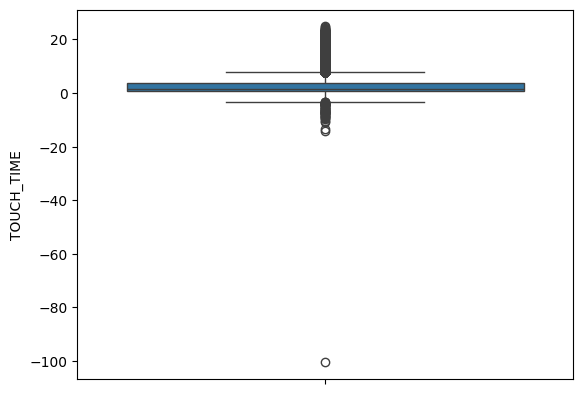

In [46]:
#'TOUCH_TIME': Ukupno vrijeme dodira s loptom prije izvođenja šuta.
sns.boxplot(X['TOUCH_TIME']) 
plt.show()


- izbacujemo sve koji imaju negativnu vrijednost ukupnog dodira s loptom prije šuta

<Axes: ylabel='TOUCH_TIME'>

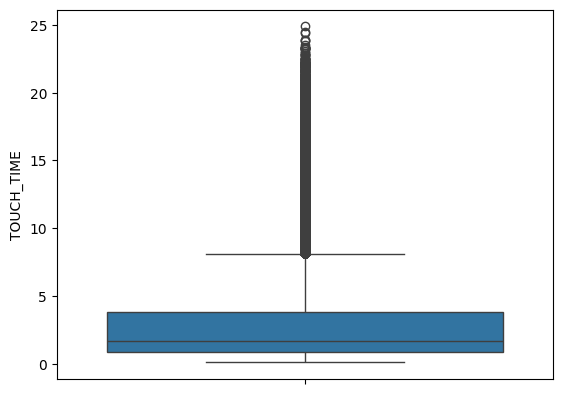

In [48]:
X = X.loc[(X.TOUCH_TIME > 0)]
sns.boxplot(X['TOUCH_TIME'])

- vizualiziramo podatke za PERIOD, odnosno period utakmice u kojem je šut izveden (npr. 1. četvrtina, 2. četvrtina itd.)

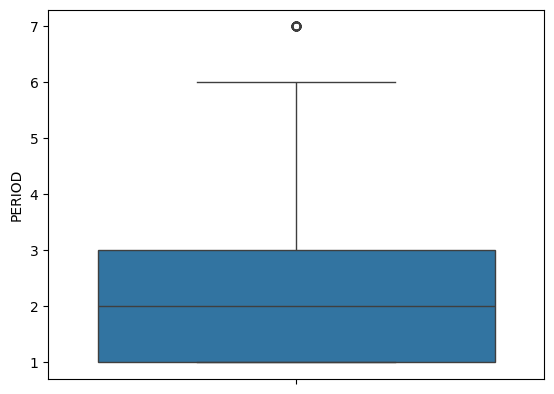

In [50]:
sns.boxplot(X['PERIOD']) 
plt.show()

- znamo da postoji ukupno 4 perioda te izbacujemo sve primjere gdje je period > 4

<Axes: ylabel='PERIOD'>

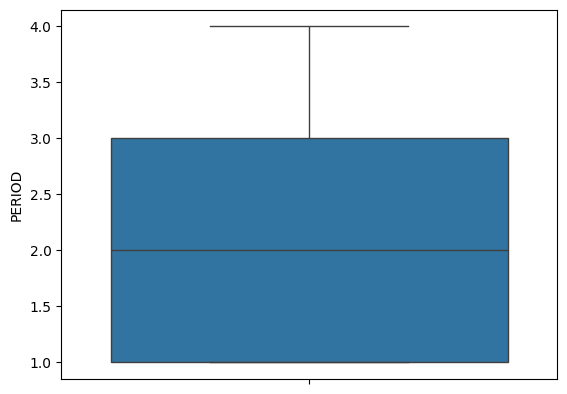

In [60]:
X = X.loc[(X.PERIOD <= 4)]
sns.boxplot(X['PERIOD'])

## Vizualizacija korelacija

- korisno je vizualizirati korelaciju između svake značajke i ciljne varijable, kao što je 'SHOT_RESULT' ili FGM (binarna varijabla o uspješnosti bacanja)

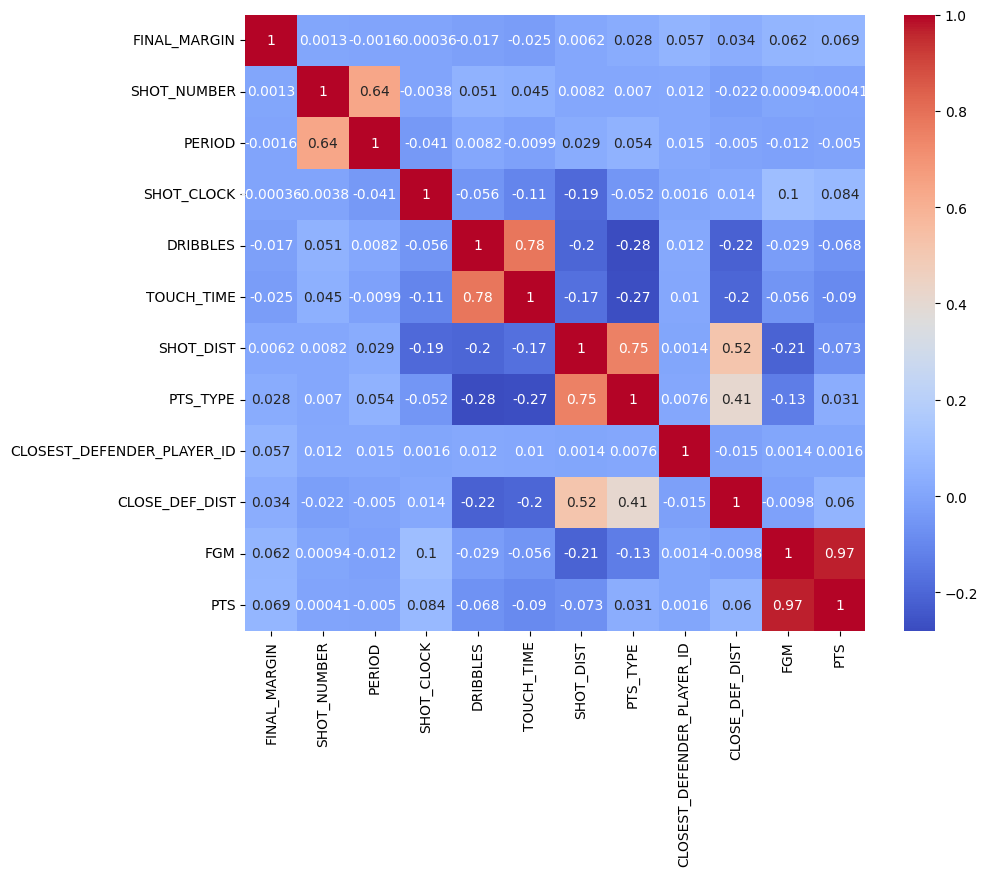

In [58]:
X_numeric = X.loc[:, ~X.columns.isin(['LOCATION', 'W', 'GAME_CLOCK', 'SHOT_RESULT', 'CLOSEST_DEFENDER'])]

# corr() funkcija za izračun korelacije između numeričkih značajki
correlation_matrix = X_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

## Histogrami
- možemo prikazati histograme za različite značajke

### SHOT_DISC histogram
-  prikazuje  učestalost šuteva na različitim udaljenostima od koša

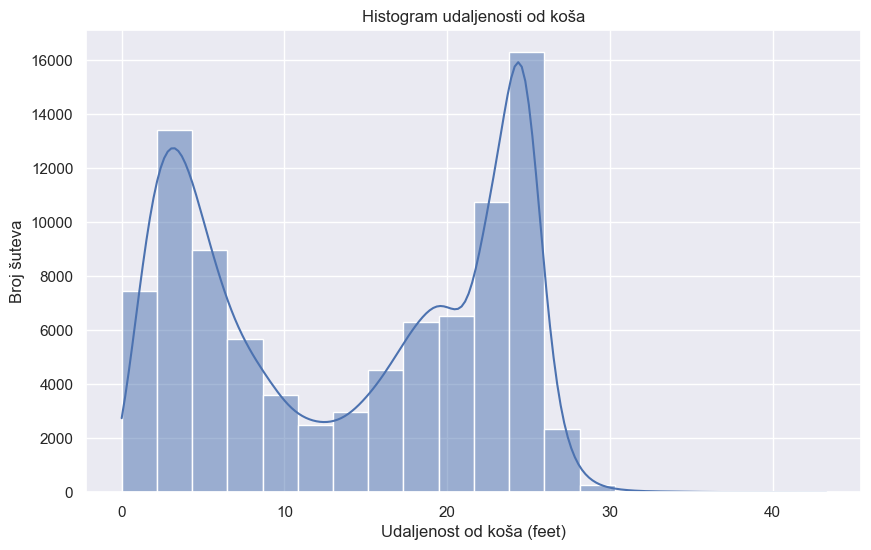

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(X['SHOT_DIST'], bins=20, kde=True)
plt.xlabel('Udaljenost od koša (feet)')
plt.ylabel('Broj šuteva')
plt.title('Histogram udaljenosti od koša')
plt.show()

### SHOT_TIME histrogram
-  histogram za 'TOUCH_TIME' koji prikazuje raspodjelu vremena koje igrači provode s loptom prije izvođenja šuta

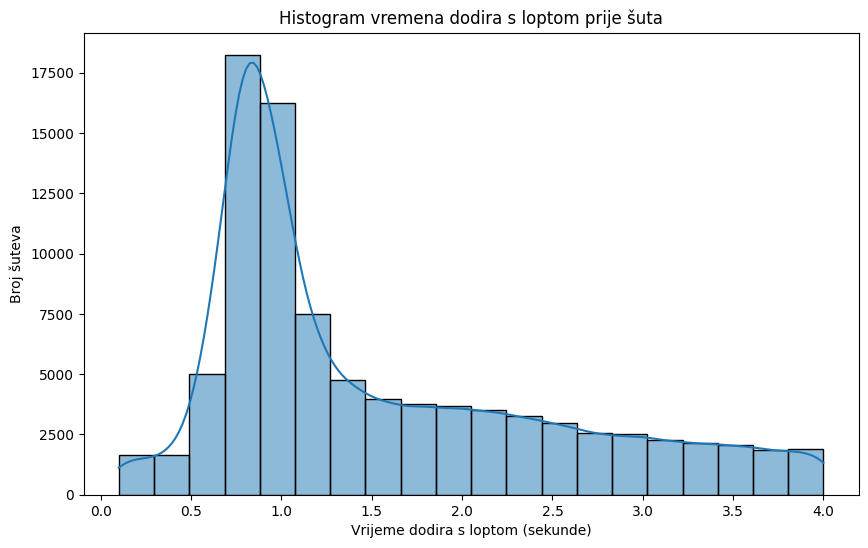

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(X['TOUCH_TIME'], bins=20, kde=True)
plt.xlabel('Vrijeme dodira s loptom (sekunde)')
plt.ylabel('Broj šuteva')
plt.title('Histogram vremena dodira s loptom prije šuta')
plt.show()

## Stupičasti dijagram
- želimo prikazat ovisnost broja pogodaka o četvrti

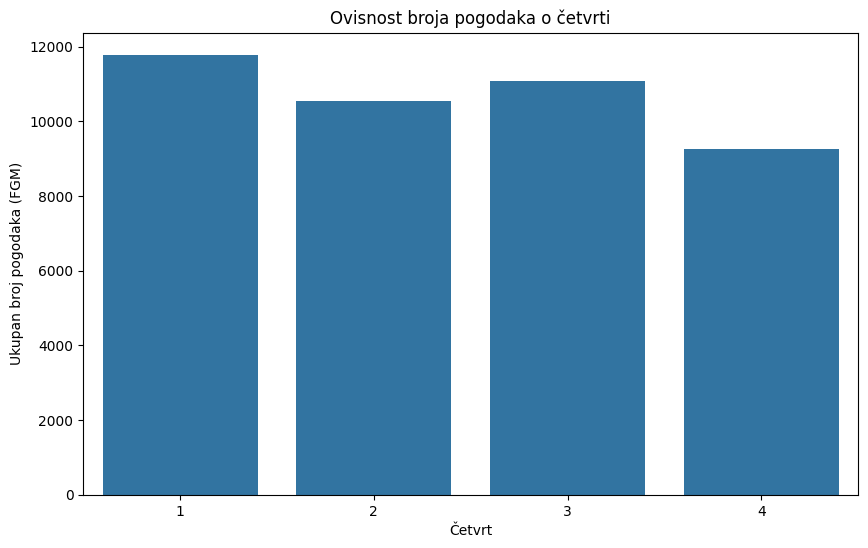

In [70]:
period_fgm = X.groupby('PERIOD')['FGM'].sum().reset_index() #Grupiranje podatke prema četvrtima i izračun ukupan broj pogodaka (FGM) u svakoj četvrti

plt.figure(figsize=(10, 6))
sns.barplot(data=period_fgm, x='PERIOD', y='FGM')
plt.xlabel('Četvrt')
plt.ylabel('Ukupan broj pogodaka (FGM)')
plt.title('Ovisnost broja pogodaka o četvrti')
plt.show()


## Linijski dijagram
- želimo prikazati raspodjelu pogodaka u odnosu na udaljenost od koša
- ovo je gore napravljeni dijagram samo na linijski način

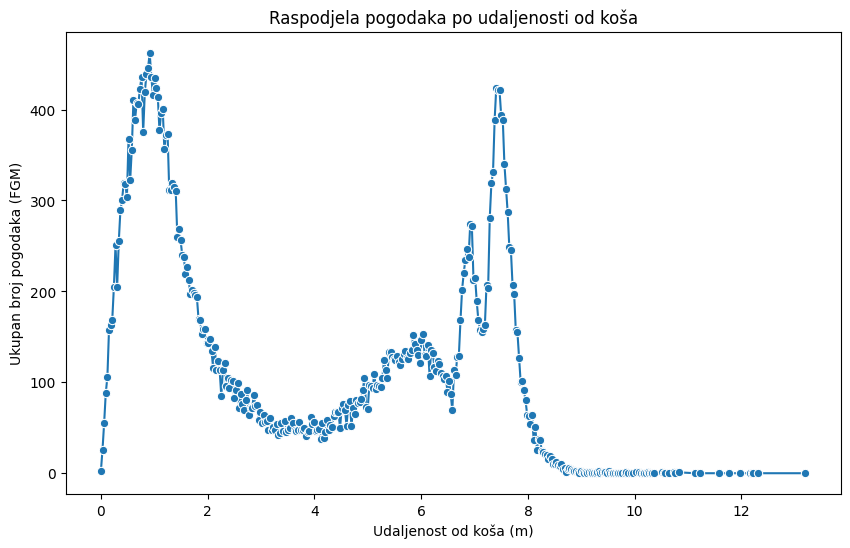

In [74]:
X['SHOT_DIST_METERS'] = X['SHOT_DIST'] * 0.3048 #pretvraamo stopala u metre
distance_fg_data = X.groupby('SHOT_DIST_METERS')['FGM'].sum().reset_index() # grupiranje podatka po udaljenosti i zatim sumirati broj pogodaka za svaku grupu

plt.figure(figsize=(10, 6))
sns.lineplot(data=distance_fg_data, x='SHOT_DIST_METERS', y='FGM', marker='o')
plt.xlabel('Udaljenost od koša (m)')
plt.ylabel('Ukupan broj pogodaka (FGM)')
plt.title('Raspodjela pogodaka po udaljenosti od koša')
plt.show()

## Matrica dijagrama raspršenja

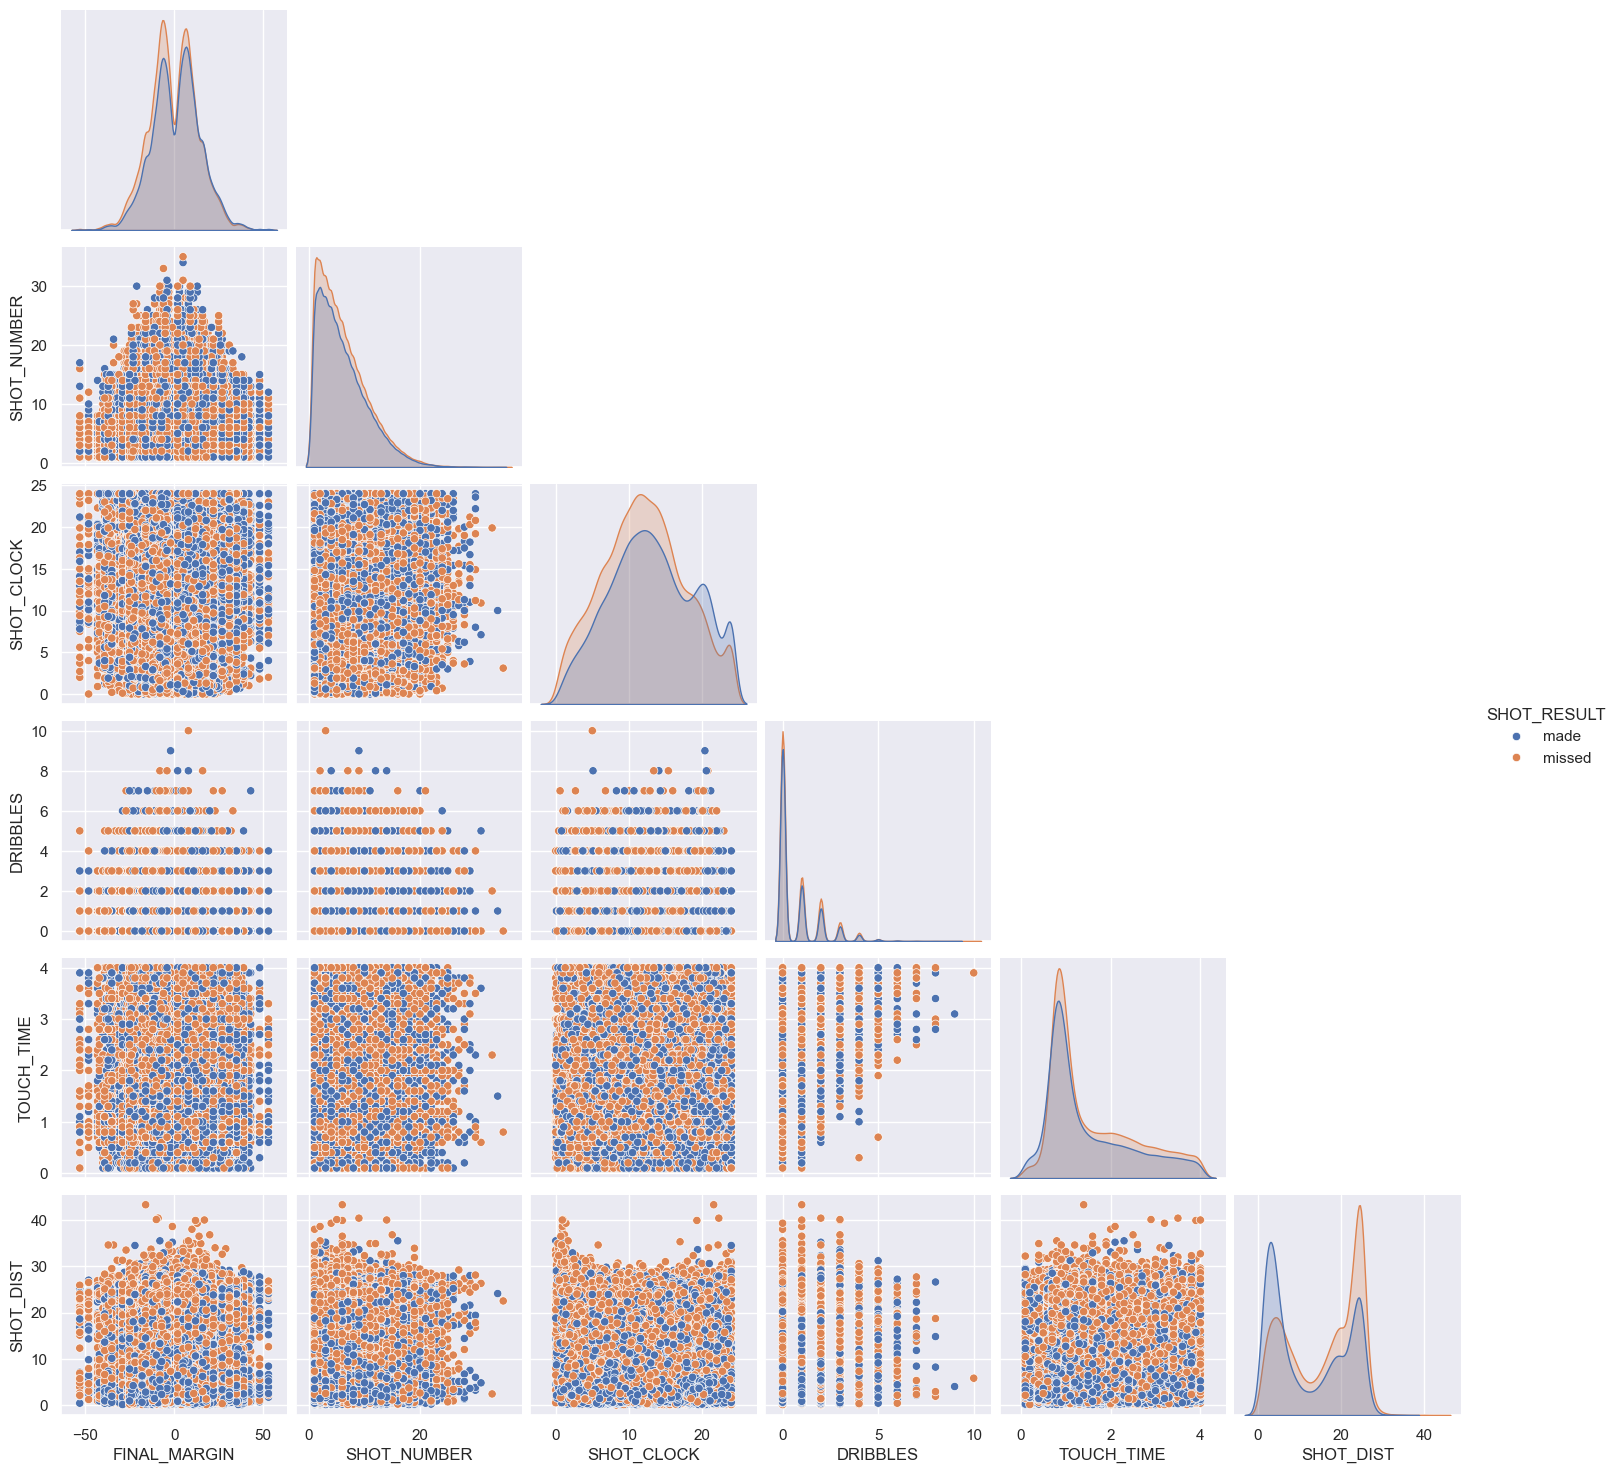

In [80]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(X.loc[:,['FINAL_MARGIN', 'SHOT_NUMBER', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'SHOT_RESULT']], hue="SHOT_RESULT", corner=True)
plt.show()

## Zadnji pregled pogodataka
- U znanstvenom radu piše da su FGM i PTS savršeni prediktori shot resulta što znači da možemo izbaciti bilo koje dvije od te
tri značajke za daljni rad s modelom

In [85]:
X.drop(('FGM'), axis=1, inplace=True)
X.drop(('PTS'), axis=1, inplace=True)
X.drop(('PTS_TYPE'), axis=1, inplace=True) #izbacujem jer direktno ovisi o SHOT_DIST

In [86]:
X. describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,SHOT_DIST_METERS
count,91554.000000,91554.000000,91554.000000,91554.000000,91554.000000,91554.000000,91554.000000,91554.000000,91554.000000,91554.000000
mean,0.248149,6.100935,2.431079,12.577527,0.700461,1.546586,14.126623,158814.245746,4.402408,4.305795
std,13.453551,4.385658,1.111088,5.746589,1.090187,0.969092,8.970051,78881.842148,2.904880,2.734072
min,-53.000000,1.000000,1.000000,0.000000,0.000000,0.100000,0.000000,708.000000,0.000000,0.000000
25%,-9.000000,3.000000,1.000000,8.400000,0.000000,0.800000,4.700000,101187.000000,2.400000,1.432560
50%,1.000000,5.000000,2.000000,12.400000,0.000000,1.100000,15.900000,201949.000000,4.000000,4.846320
75%,9.000000,9.000000,3.000000,16.700000,1.000000,2.200000,23.000000,203079.000000,5.600000,7.010400
max,53.000000,35.000000,4.000000,24.000000,10.000000,4.000000,43.300000,530027.000000,53.200000,13.197840
